In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as ss

In [199]:
df1 = pd.read_csv("Data/India Agriculture Crop Production.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [200]:
for i in df1.columns:
    print(f"Unique values in {i} is {df1[i].nunique()}")

Unique values in State is 36
Unique values in District is 729
Unique values in Crop is 56
Unique values in Year is 24
Unique values in Season is 6
Unique values in Area is 48006
Unique values in Area Units is 1
Unique values in Production is 69078
Unique values in Production Units is 3
Unique values in Yield is 197154


In [201]:
Year = df1["Year"].unique()
print(Year)

['2001-02' '2002-03' '2003-04' '2004-05' '2005-06' '2006-07' '2007-08'
 '2008-09' '2009-10' '2010-11' '2011-12' '2012-13' '2013-14' '2014-15'
 '2015-16' '2016-17' '2017-18' '2018-19' '2019-20' '2020-21' '2000-01'
 '1997-98' '1998-99' '1999-00']


In [202]:
df1['Year'] = df1['Year'].str.extract(r'(\d+)', expand=False).astype(int)
print(df1["Year"].unique())

[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2000 1997 1998 1999]


In [203]:
def clean_categorical_features(df):
    categorical_cols = df.select_dtypes(include='object').columns
    for col in categorical_cols:
        df[col] = df[col].str.strip().str.lower()
    
    return df

df1 = clean_categorical_features(df1)

In [204]:
df1["Production Units"].unique()

array(['tonnes', 'nuts', 'bales'], dtype=object)

In [205]:
dfx = df1[df1["Production Units"]=="tonnes"]
dfy = df1[df1["Production Units"]=="nuts"]
dfz = df1[df1["Production Units"]=="bales"]

In [206]:
print("Ton df null values\n",dfx.isnull().sum(),"\n")
print("Nut df null values\n",dfy.isnull().sum(),"\n")
print("Bale df null values\n",dfz.isnull().sum(),"\n")

Ton df null values
 State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4687
Production Units       0
Yield                 33
dtype: int64 

Nut df null values
 State                0
District             0
Crop                 0
Year                 0
Season               0
Area                 0
Area Units           0
Production          36
Production Units     0
Yield                0
dtype: int64 

Bale df null values
 State                 0
District              0
Crop                  0
Year                  0
Season                0
Area                  0
Area Units            0
Production          270
Production Units      0
Yield                 0
dtype: int64 



In [207]:
def print_null_rows(df):
    null_mask = df.isnull().any(axis=1)
    null_rows = df[null_mask]
    print(null_rows)


In [208]:
dfx = dfx.dropna(subset=['Season'])
dfx = dfx.dropna(subset=['Crop'])
dfx = dfx.dropna(subset=['Production'])
dfy = dfy.dropna(subset=['Production'])
dfz = dfz.dropna(subset=['Production'])
print("Ton df null values\n",dfx.isnull().sum(),"\n")
print("Nut df null values\n",dfy.isnull().sum(),"\n")
print("Bale df null values\n",dfz.isnull().sum(),"\n")

Ton df null values
 State               0
District            0
Crop                0
Year                0
Season              0
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
dtype: int64 

Nut df null values
 State               0
District            0
Crop                0
Year                0
Season              0
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
dtype: int64 

Bale df null values
 State               0
District            0
Crop                0
Year                0
Season              0
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
dtype: int64 



In [209]:
dfx.info()
dfy.info()
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326999 entries, 0 to 345374
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             326999 non-null  object 
 1   District          326999 non-null  object 
 2   Crop              326999 non-null  object 
 3   Year              326999 non-null  int32  
 4   Season            326999 non-null  object 
 5   Area              326999 non-null  float64
 6   Area Units        326999 non-null  object 
 7   Production        326999 non-null  float64
 8   Production Units  326999 non-null  object 
 9   Yield             326999 non-null  float64
dtypes: float64(3), int32(1), object(6)
memory usage: 26.2+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 2891 entries, 20 to 343483
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             2891 non-null   object 
 1   Dist

In [210]:
for i in dfx.columns:
    print(f"Unique values in {i} is {dfx[i].nunique()}")

Unique values in State is 36
Unique values in District is 728
Unique values in Crop is 52
Unique values in Year is 24
Unique values in Season is 6
Unique values in Area is 46121
Unique values in Area Units is 1
Unique values in Production is 64373
Unique values in Production Units is 1
Unique values in Yield is 188361


In [211]:
for i in dfy.columns:
    print(f"Unique values in {i} is {dfy[i].nunique()}")

Unique values in State is 12
Unique values in District is 182
Unique values in Crop is 1
Unique values in Year is 23
Unique values in Season is 2
Unique values in Area is 2179
Unique values in Area Units is 1
Unique values in Production is 2631
Unique values in Production Units is 1
Unique values in Yield is 2742


In [212]:
for i in dfz.columns:
    print(f"Unique values in {i} is {dfz[i].nunique()}")

Unique values in State is 26
Unique values in District is 545
Unique values in Crop is 3
Unique values in Year is 23
Unique values in Season is 6
Unique values in Area is 4872
Unique values in Area Units is 1
Unique values in Production is 6072
Unique values in Production Units is 1
Unique values in Yield is 7975


In [213]:
dfx = dfx.drop(["Area Units", "Production Units", "Yield"],axis=1)
dfy = dfy.drop(["Area Units", "Production Units", "Yield"],axis=1)
dfz = dfz.drop(["Area Units", "Production Units", "Yield"],axis=1)
dfx.info()
dfy.info()
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326999 entries, 0 to 345374
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       326999 non-null  object 
 1   District    326999 non-null  object 
 2   Crop        326999 non-null  object 
 3   Year        326999 non-null  int32  
 4   Season      326999 non-null  object 
 5   Area        326999 non-null  float64
 6   Production  326999 non-null  float64
dtypes: float64(2), int32(1), object(4)
memory usage: 18.7+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 2891 entries, 20 to 343483
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       2891 non-null   object 
 1   District    2891 non-null   object 
 2   Crop        2891 non-null   object 
 3   Year        2891 non-null   int32  
 4   Season      2891 non-null   object 
 5   Area        2891 non-null   float64
 6   Production  2891 

In [214]:
def add_lag_features(df, features, max_lag):
    for feature in features:
        for lag in range(1, max_lag + 1):
            df[f'{feature}_lag{lag}'] = df[feature].shift(lag)
    df.dropna(inplace=True)  # Drop rows with NaN values introduced by the lagging
    return df

lag_features = ['Production']
max_lag = 3 

In [215]:
dfx = add_lag_features(dfx, lag_features, max_lag)
dfy = add_lag_features(dfy, lag_features, max_lag)
dfz = add_lag_features(dfz, lag_features, max_lag)
dfx.info()
dfy.info()
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326996 entries, 3 to 345374
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   State            326996 non-null  object 
 1   District         326996 non-null  object 
 2   Crop             326996 non-null  object 
 3   Year             326996 non-null  int32  
 4   Season           326996 non-null  object 
 5   Area             326996 non-null  float64
 6   Production       326996 non-null  float64
 7   Production_lag1  326996 non-null  float64
 8   Production_lag2  326996 non-null  float64
 9   Production_lag3  326996 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 26.2+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 2888 entries, 23 to 343483
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State            2888 non-null   object 
 1   District         28

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [217]:
label_encoders1 = {}
label_encoders2 = {}
label_encoders3 = {}
categorical_features = ['State', 'District', 'Crop', 'Year', 'Season']
for feature in categorical_features:
    le1 = LabelEncoder()
    le2 = LabelEncoder()
    le3 = LabelEncoder()
    dfx[feature] = le1.fit_transform(dfx[feature])
    label_encoders1[feature] = le1
    dfy[feature] = le2.fit_transform(dfy[feature])
    label_encoders2[feature] = le2
    dfz[feature] = le3.fit_transform(dfz[feature])
    label_encoders3[feature] = le3


In [218]:
scaler_ton = {}
scaler_nut = {}
scaler_bale = {}
numerical_features = ['Area', 'Production','Production_lag1',
                      'Production_lag2', 'Production_lag3']

for i in numerical_features:
    scaler_ton[i] = MinMaxScaler()
    scaler_nut[i] = MinMaxScaler()
    scaler_bale[i] = MinMaxScaler()
    dfx[i] = scaler_ton[i].fit_transform(dfx[i].values.reshape(-1, 1))
    dfy[i] = scaler_nut[i].fit_transform(dfy[i].values.reshape(-1, 1))
    dfz[i] = scaler_bale[i].fit_transform(dfz[i].values.reshape(-1, 1))



In [219]:
dfx.info()
dfy.info()
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326996 entries, 3 to 345374
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   State            326996 non-null  int32  
 1   District         326996 non-null  int32  
 2   Crop             326996 non-null  int32  
 3   Year             326996 non-null  int64  
 4   Season           326996 non-null  int32  
 5   Area             326996 non-null  float64
 6   Production       326996 non-null  float64
 7   Production_lag1  326996 non-null  float64
 8   Production_lag2  326996 non-null  float64
 9   Production_lag3  326996 non-null  float64
dtypes: float64(5), int32(4), int64(1)
memory usage: 22.5 MB
<class 'pandas.core.frame.DataFrame'>
Index: 2888 entries, 23 to 343483
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State            2888 non-null   int32  
 1   District         2888

In [220]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length][-1]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys).reshape(-1, 1)

seq_length = 10
#features = ['State', 'District', 'Crop', 'Year', 'Season', 'Area']
features = categorical_features+numerical_features
features.remove("Production")

target = 'Production'
datax = dfx[features + [target]].values
datay = dfy[features + [target]].values
dataz = dfz[features + [target]].values

X1, y1 = create_sequences(datax, seq_length)
X2, y2 = create_sequences(datay, seq_length)
X3, y3 = create_sequences(dataz, seq_length)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [221]:
import torch
from torch.utils.data import Dataset, DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.float32).to(device), torch.tensor(self.y[idx], dtype=torch.float32).to(device)


Using device: cuda


In [222]:
train_dataset1 = TimeSeriesDataset(X_train1, y_train1)
test_dataset1 = TimeSeriesDataset(X_test1, y_test1)
train_loader1 = DataLoader(train_dataset1, batch_size=32, shuffle=True)
test_loader1 = DataLoader(test_dataset1, batch_size=32, shuffle=False)

In [223]:
train_dataset2 = TimeSeriesDataset(X_train2, y_train2)
test_dataset2 = TimeSeriesDataset(X_test2, y_test2)
train_loader2 = DataLoader(train_dataset2, batch_size=32, shuffle=True)
test_loader2 = DataLoader(test_dataset2, batch_size=32, shuffle=False)

In [224]:
train_dataset3 = TimeSeriesDataset(X_train3, y_train3)
test_dataset3 = TimeSeriesDataset(X_test3, y_test3)
train_loader3 = DataLoader(train_dataset3, batch_size=32, shuffle=True)
test_loader3 = DataLoader(test_dataset3, batch_size=32, shuffle=False)

In [225]:
import torch.nn as nn

class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

In [226]:
input_dim = X_train1.shape[2]
hidden_dim = 50
output_dim = 1
num_layers = 1

rnn_model1 = RNNModel(input_dim, hidden_dim, output_dim, num_layers).to(device)
lstm_model1 = LSTMModel(input_dim, hidden_dim, output_dim, num_layers).to(device)
gru_model1 = GRUModel(input_dim, hidden_dim, output_dim, num_layers).to(device)

In [227]:
input_dim = X_train2.shape[2]
hidden_dim = 50
output_dim = 1
num_layers = 1

rnn_model2 = RNNModel(input_dim, hidden_dim, output_dim, num_layers).to(device)
lstm_model2 = LSTMModel(input_dim, hidden_dim, output_dim, num_layers).to(device)
gru_model2 = GRUModel(input_dim, hidden_dim, output_dim, num_layers).to(device)

In [228]:
input_dim = X_train3.shape[2]
hidden_dim = 50
output_dim = 1
num_layers = 1

rnn_model3 = RNNModel(input_dim, hidden_dim, output_dim, num_layers).to(device)
lstm_model3 = LSTMModel(input_dim, hidden_dim, output_dim, num_layers).to(device)
gru_model3 = GRUModel(input_dim, hidden_dim, output_dim, num_layers).to(device)

In [229]:
import torch.optim as optim

def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    xt = [0]
    yt = [0]
    model.train()
    for epoch in range(num_epochs):
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
        xt.append(epoch+1)
        yt.append(loss.item())
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')
    
    xt = np.array(xt)
    yt = np.array(yt)
    plt.plot(xt,yt)
    plt.xlabel("Epochs")
    plt.ylabel("Avg_Epoch per Epoch")
    plt.title("Epoch vs Loss Plot")
    plt.show()


In [230]:
criterion1 = nn.MSELoss()
rnn_optimizer1 = optim.Adam(rnn_model1.parameters(), lr=0.001)
lstm_optimizer1 = optim.Adam(lstm_model1.parameters(), lr=0.001)
gru_optimizer1 = optim.Adam(gru_model1.parameters(), lr=0.001)

In [231]:
criterion2 = nn.MSELoss()
rnn_optimizer2 = optim.Adam(rnn_model2.parameters(), lr=0.001)
lstm_optimizer2 = optim.Adam(lstm_model2.parameters(), lr=0.001)
gru_optimizer2 = optim.Adam(gru_model2.parameters(), lr=0.001)

In [232]:
criterion3 = nn.MSELoss()
rnn_optimizer3 = optim.Adam(rnn_model3.parameters(), lr=0.001)
lstm_optimizer3 = optim.Adam(lstm_model3.parameters(), lr=0.001)
gru_optimizer3 = optim.Adam(gru_model3.parameters(), lr=0.001)

Epoch 1/20, Loss: 2.8216918508405797e-05
Epoch 2/20, Loss: 1.8667715266929008e-05
Epoch 3/20, Loss: 0.022829703986644745
Epoch 4/20, Loss: 1.162325861514546e-05
Epoch 5/20, Loss: 2.3046808564686216e-05
Epoch 6/20, Loss: 1.4499894859909546e-05
Epoch 7/20, Loss: 5.033671550336294e-05
Epoch 8/20, Loss: 0.00100779312197119
Epoch 9/20, Loss: 7.960906600601447e-07
Epoch 10/20, Loss: 5.2423922170419246e-05
Epoch 11/20, Loss: 1.3096010661683977e-05
Epoch 12/20, Loss: 2.495244007150177e-05
Epoch 13/20, Loss: 1.3123114683821768e-07
Epoch 14/20, Loss: 0.00022806195192970335
Epoch 15/20, Loss: 1.939245885296259e-05
Epoch 16/20, Loss: 2.704335656744661e-06
Epoch 17/20, Loss: 0.00017898502119351178
Epoch 18/20, Loss: 0.0011248093796893954
Epoch 19/20, Loss: 1.825353319873102e-05
Epoch 20/20, Loss: 1.930325925059151e-05


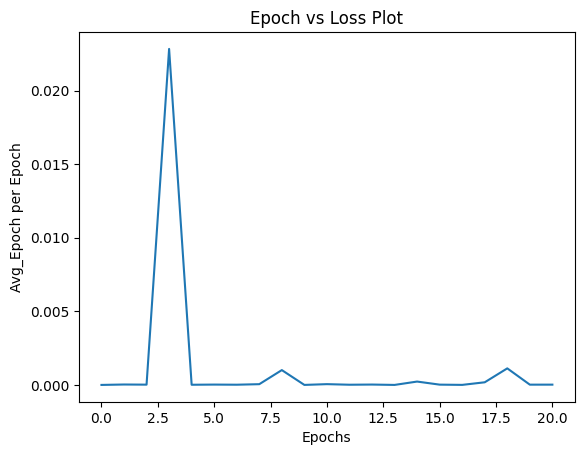

Epoch 1/20, Loss: 0.00037984136724844575
Epoch 2/20, Loss: 5.2867453632643446e-05
Epoch 3/20, Loss: 1.3974315152154304e-05
Epoch 4/20, Loss: 1.9972976588178426e-05
Epoch 5/20, Loss: 1.0347430361434817e-05
Epoch 6/20, Loss: 1.4661834939033724e-05
Epoch 7/20, Loss: 0.00010377397848060355
Epoch 8/20, Loss: 1.75732475327095e-05
Epoch 9/20, Loss: 1.4184126939653652e-06
Epoch 10/20, Loss: 1.9489811165840365e-05
Epoch 11/20, Loss: 5.2960735047236085e-05
Epoch 12/20, Loss: 7.00019654686912e-06
Epoch 13/20, Loss: 4.12027511629276e-05
Epoch 14/20, Loss: 4.1466919356025755e-06
Epoch 15/20, Loss: 5.903883447899716e-06
Epoch 16/20, Loss: 1.5037883713375777e-05
Epoch 17/20, Loss: 1.1313743016216904e-05
Epoch 18/20, Loss: 7.321670273086056e-05
Epoch 19/20, Loss: 2.9877317047066754e-06
Epoch 20/20, Loss: 2.811767672028509e-06


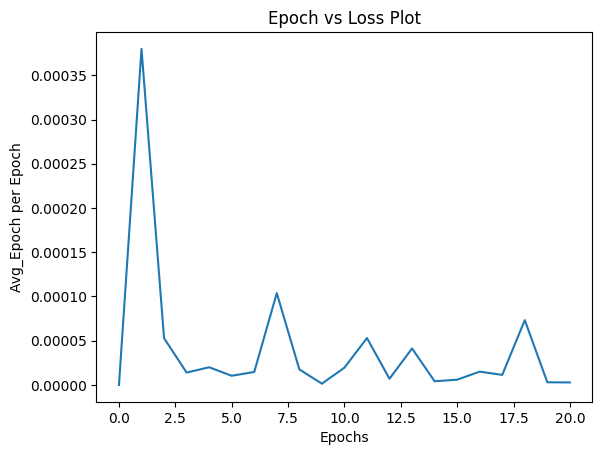

Epoch 1/20, Loss: 2.802746712404769e-05
Epoch 2/20, Loss: 9.19106514629675e-06
Epoch 3/20, Loss: 4.0079372411128134e-05
Epoch 4/20, Loss: 9.61826226557605e-05
Epoch 5/20, Loss: 0.00010912995639955625
Epoch 6/20, Loss: 5.375606633606367e-05
Epoch 7/20, Loss: 1.5442743460880592e-05
Epoch 8/20, Loss: 3.420373468543403e-05
Epoch 9/20, Loss: 0.0012662275694310665
Epoch 10/20, Loss: 4.195018482278101e-05
Epoch 11/20, Loss: 1.6914902516873553e-05
Epoch 12/20, Loss: 5.3931285947328433e-05
Epoch 13/20, Loss: 6.524252512463136e-06
Epoch 14/20, Loss: 1.5327115761465393e-05
Epoch 15/20, Loss: 1.2488885658967774e-05
Epoch 16/20, Loss: 7.177214865805581e-05
Epoch 17/20, Loss: 3.6198355246597202e-06
Epoch 18/20, Loss: 2.8017810109304264e-05
Epoch 19/20, Loss: 2.9345434086280875e-05
Epoch 20/20, Loss: 6.764749400645087e-07


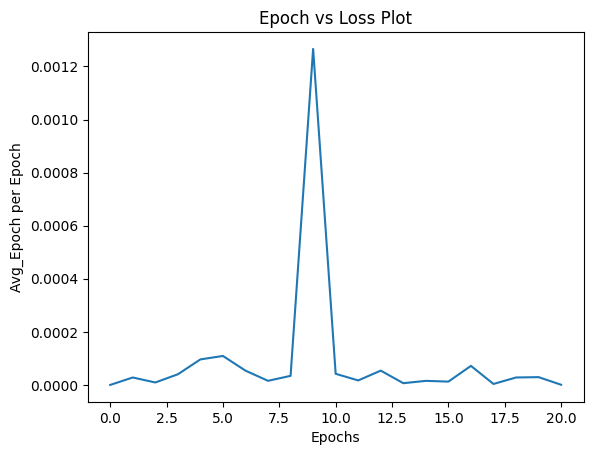

In [233]:
train_model(rnn_model1, train_loader1, criterion1, rnn_optimizer1, num_epochs=20)
train_model(lstm_model1, train_loader1, criterion1, lstm_optimizer1, num_epochs=20)
train_model(gru_model1, train_loader1, criterion1, gru_optimizer1, num_epochs=20)

Epoch 1/20, Loss: 0.01087229698896408
Epoch 2/20, Loss: 0.018931174650788307
Epoch 3/20, Loss: 0.0266264695674181
Epoch 4/20, Loss: 0.008788286708295345
Epoch 5/20, Loss: 0.005595676600933075
Epoch 6/20, Loss: 0.01080374140292406
Epoch 7/20, Loss: 0.007186685688793659
Epoch 8/20, Loss: 0.004349921829998493
Epoch 9/20, Loss: 0.00966506265103817
Epoch 10/20, Loss: 0.0061650811694562435
Epoch 11/20, Loss: 0.0018113943515345454
Epoch 12/20, Loss: 0.0080143166705966
Epoch 13/20, Loss: 0.005053224973380566
Epoch 14/20, Loss: 0.008643086068332195
Epoch 15/20, Loss: 0.02037232182919979
Epoch 16/20, Loss: 0.00724549638107419
Epoch 17/20, Loss: 0.005445769988000393
Epoch 18/20, Loss: 0.0028636364731937647
Epoch 19/20, Loss: 0.0032051559537649155
Epoch 20/20, Loss: 0.0026472206227481365


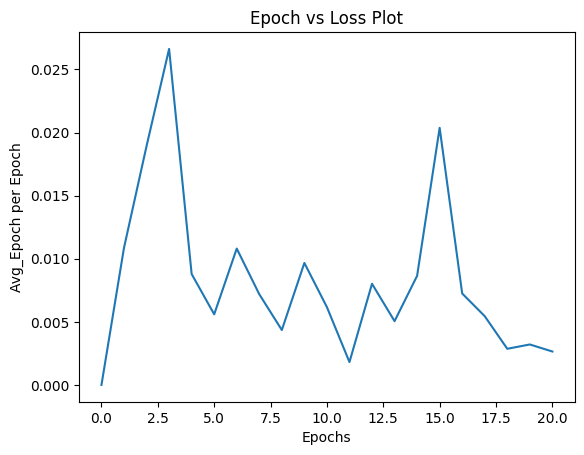

Epoch 1/20, Loss: 0.0065122684463858604
Epoch 2/20, Loss: 0.030542580410838127
Epoch 3/20, Loss: 0.01957961544394493
Epoch 4/20, Loss: 0.004261786118149757
Epoch 5/20, Loss: 0.011049364693462849
Epoch 6/20, Loss: 0.008972675539553165
Epoch 7/20, Loss: 0.0065756505355238914
Epoch 8/20, Loss: 0.015590719878673553
Epoch 9/20, Loss: 0.00726414704695344
Epoch 10/20, Loss: 0.01215860340744257
Epoch 11/20, Loss: 0.009444568306207657
Epoch 12/20, Loss: 0.011503986082971096
Epoch 13/20, Loss: 0.004433425609022379
Epoch 14/20, Loss: 0.020812224596738815
Epoch 15/20, Loss: 0.02551618404686451
Epoch 16/20, Loss: 0.004224386066198349
Epoch 17/20, Loss: 0.004258307162672281
Epoch 18/20, Loss: 0.003266186686232686
Epoch 19/20, Loss: 0.004881598521023989
Epoch 20/20, Loss: 0.0015759888337925076


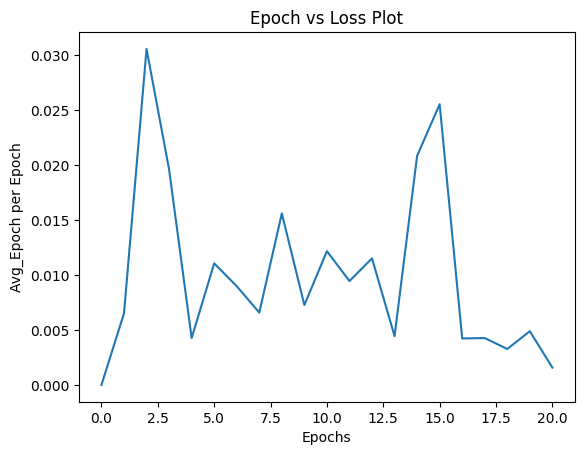

Epoch 1/20, Loss: 0.03243173286318779
Epoch 2/20, Loss: 0.0316503569483757
Epoch 3/20, Loss: 0.0023560794070363045
Epoch 4/20, Loss: 0.012234017252922058
Epoch 5/20, Loss: 0.009815719909965992
Epoch 6/20, Loss: 0.009539810940623283
Epoch 7/20, Loss: 0.003904686076566577
Epoch 8/20, Loss: 0.008800718002021313
Epoch 9/20, Loss: 0.012585572898387909
Epoch 10/20, Loss: 0.004296797793358564
Epoch 11/20, Loss: 0.003198059741407633
Epoch 12/20, Loss: 0.0194039735943079
Epoch 13/20, Loss: 0.020090630277991295
Epoch 14/20, Loss: 0.02428949438035488
Epoch 15/20, Loss: 0.011750730685889721
Epoch 16/20, Loss: 0.001239374396391213
Epoch 17/20, Loss: 0.0038122397381812334
Epoch 18/20, Loss: 0.011889263987541199
Epoch 19/20, Loss: 0.00895833782851696
Epoch 20/20, Loss: 0.0049111987464129925


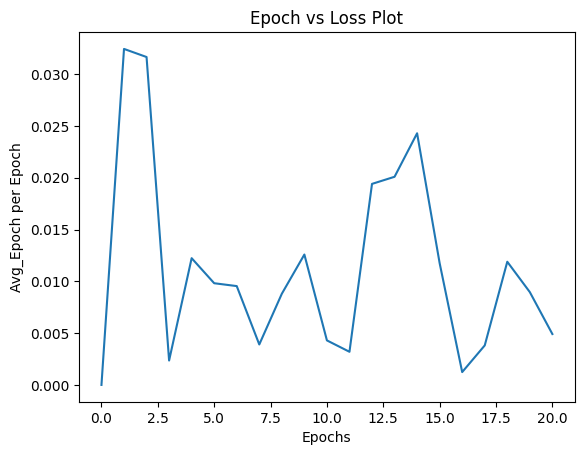

In [234]:
train_model(rnn_model2, train_loader2, criterion2, rnn_optimizer2, num_epochs=20)
train_model(lstm_model2, train_loader2, criterion2, lstm_optimizer2, num_epochs=20)
train_model(gru_model2, train_loader2, criterion2, gru_optimizer2, num_epochs=20)

Epoch 1/20, Loss: 0.003363802097737789
Epoch 2/20, Loss: 0.04674410820007324
Epoch 3/20, Loss: 0.04005791246891022
Epoch 4/20, Loss: 0.0032992451451718807
Epoch 5/20, Loss: 0.005863628815859556
Epoch 6/20, Loss: 0.005083790980279446
Epoch 7/20, Loss: 0.0008769912528805435
Epoch 8/20, Loss: 0.005424603819847107
Epoch 9/20, Loss: 0.0005427687428891659
Epoch 10/20, Loss: 0.0030397209338843822
Epoch 11/20, Loss: 0.003441090229898691
Epoch 12/20, Loss: 0.008549582213163376
Epoch 13/20, Loss: 0.00030800531385466456
Epoch 14/20, Loss: 0.003380953101441264
Epoch 15/20, Loss: 0.00074893853161484
Epoch 16/20, Loss: 0.0023437300696969032
Epoch 17/20, Loss: 0.0011761635541915894
Epoch 18/20, Loss: 0.0013706921599805355
Epoch 19/20, Loss: 0.0009461583103984594
Epoch 20/20, Loss: 0.002193798078224063


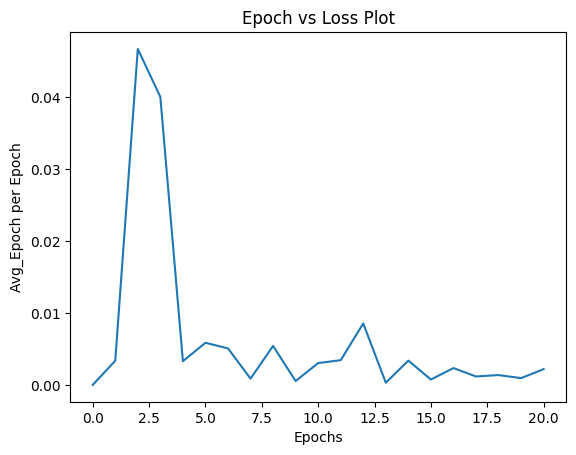

Epoch 1/20, Loss: 0.0005991881480440497
Epoch 2/20, Loss: 0.0027782851830124855
Epoch 3/20, Loss: 0.0002480596012901515
Epoch 4/20, Loss: 0.01014711707830429
Epoch 5/20, Loss: 0.005004074890166521
Epoch 6/20, Loss: 0.0006014239625073969
Epoch 7/20, Loss: 0.0029859039932489395
Epoch 8/20, Loss: 0.0005426904535852373
Epoch 9/20, Loss: 0.008386299014091492
Epoch 10/20, Loss: 0.001500216661952436
Epoch 11/20, Loss: 0.0004535913176368922
Epoch 12/20, Loss: 0.0031117748003453016
Epoch 13/20, Loss: 0.0015353304333984852
Epoch 14/20, Loss: 0.000712293665856123
Epoch 15/20, Loss: 0.0009999254252761602
Epoch 16/20, Loss: 0.002317957580089569
Epoch 17/20, Loss: 0.00020178155682515353
Epoch 18/20, Loss: 0.0046596648171544075
Epoch 19/20, Loss: 0.0009431265061721206
Epoch 20/20, Loss: 0.0007977307541295886


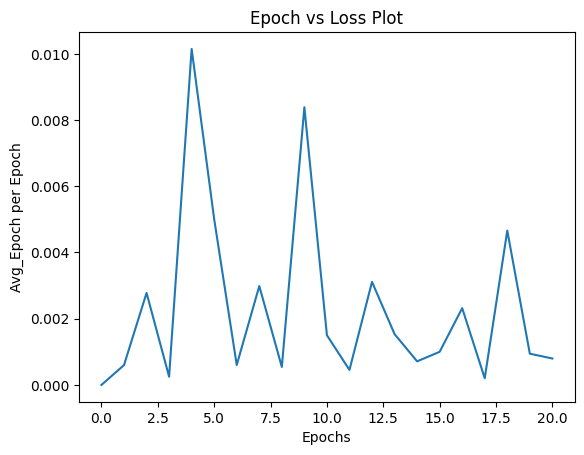

Epoch 1/20, Loss: 0.0015328725567087531
Epoch 2/20, Loss: 0.0009316214709542692
Epoch 3/20, Loss: 0.0011798066552728415
Epoch 4/20, Loss: 0.00017097126692533493
Epoch 5/20, Loss: 0.0019007334485650063
Epoch 6/20, Loss: 0.0030674031004309654
Epoch 7/20, Loss: 0.00641773222014308
Epoch 8/20, Loss: 0.0024709771387279034
Epoch 9/20, Loss: 0.0014174336101859808
Epoch 10/20, Loss: 0.014222970232367516
Epoch 11/20, Loss: 0.0038657046388834715
Epoch 12/20, Loss: 0.0030206877272576094
Epoch 13/20, Loss: 0.0012638438493013382
Epoch 14/20, Loss: 0.002625418594107032
Epoch 15/20, Loss: 0.006987745873630047
Epoch 16/20, Loss: 0.0009485632181167603
Epoch 17/20, Loss: 0.005484211724251509
Epoch 18/20, Loss: 0.0038780856411904097
Epoch 19/20, Loss: 0.007334108930081129
Epoch 20/20, Loss: 0.0012616005260497332


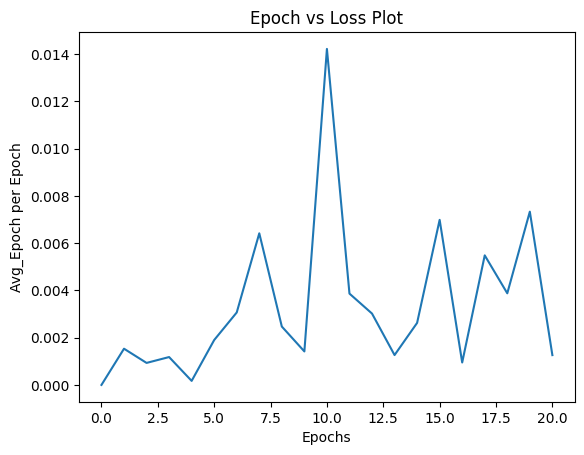

In [235]:
train_model(rnn_model3, train_loader3, criterion3, rnn_optimizer3, num_epochs=20)
train_model(lstm_model3, train_loader3, criterion3, lstm_optimizer3, num_epochs=20)
train_model(gru_model3, train_loader3, criterion3, gru_optimizer3, num_epochs=20)

In [236]:
def evaluate_model(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
    avg_loss = total_loss / len(test_loader)
    return avg_loss

In [237]:
rnn_loss1 = evaluate_model(rnn_model1, test_loader1, criterion1)
lstm_loss1 = evaluate_model(lstm_model1, test_loader1, criterion1)
gru_loss1 = evaluate_model(gru_model1, test_loader1, criterion1)

print(f'RNN Loss for Tonnes: {rnn_loss1}')
print(f'LSTM Loss for Tonnes: {lstm_loss1}')
print(f'GRU Loss for Tonnes: {gru_loss1}')

RNN Loss for Tonnes: 0.0003375703429017613
LSTM Loss for Tonnes: 0.00021091823239793904
GRU Loss for Tonnes: 0.00026462078763761813


In [238]:
rnn_loss2 = evaluate_model(rnn_model2, test_loader2, criterion2)
lstm_loss2 = evaluate_model(lstm_model2, test_loader2, criterion2)
gru_loss2 = evaluate_model(gru_model2, test_loader2, criterion2)

print(f'RNN Loss for Nuts: {rnn_loss2}')
print(f'LSTM Loss for Nuts: {lstm_loss2}')
print(f'GRU Loss for Nuts: {gru_loss2}')

RNN Loss for Nuts: 0.009065002241792778
LSTM Loss for Nuts: 0.00817155384639692
GRU Loss for Nuts: 0.008418487527200745


In [239]:
rnn_loss3 = evaluate_model(rnn_model3, test_loader3, criterion3)
lstm_loss3 = evaluate_model(lstm_model3, test_loader3, criterion3)
gru_loss3 = evaluate_model(gru_model3, test_loader3, criterion3)

print(f'RNN Loss for Bales: {rnn_loss3}')
print(f'LSTM Loss for Bales: {lstm_loss3}')
print(f'GRU Loss for Bales: {gru_loss3}')

RNN Loss for Bales: 0.003289925291359065
LSTM Loss for Bales: 0.003869452441435759
GRU Loss for Bales: 0.00507719818040531
